<h1>Exercises 2</h1>
<p>matplotlib and SQL</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 


In [2]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [3]:
%matplotlib inline


<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

In [4]:
conn = sqlite3.connect('data/sakila.db')

In [5]:
df = pd.read_sql("""
    SELECT 
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS  film_rental_duration,
        film.rental_rate AS  film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating as film_rating
    FROM rental
    INNER JOIN inventory ON inventory.inventory_id == rental.inventory_id
    INNER JOIN film ON film.film_id == inventory.inventory_id
    INNER JOIN store ON store.store_id == inventory.store_id
    INNER JOIN customer ON customer.customer_id == rental.customer_id
    INNER JOIN address ON address.address_id == customer.address_id
    INNER JOIN city ON city.city_id == address.city_id
    ;
""", conn,index_col='rental_id', parse_dates=['rental_date','return_date'])

In [6]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,guas Lindas de Gois,GOLDMINE TYCOON,6,0.99,20.99,R
16,2005-05-25 00:43:11,2005-05-26 04:42:11,CURLEY,1,Miraj,GUNFIGHTER MUSSOLINI,3,2.99,9.99,PG-13
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Cuernavaca,SPIRIT FLINTSTONES,7,0.99,23.99,R
21,2005-05-25 01:59:46,2005-05-26 01:01:46,MORRELL,1,Cavite,CHITTY LOCK,6,2.99,24.99,G
22,2005-05-25 02:19:23,2005-05-26 04:52:23,FORTIER,1,Chapra,RESURRECTION SILVERADO,6,0.99,12.99,PG


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 1 to 16045
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            3475 non-null   datetime64[ns]
 1   return_date            3430 non-null   datetime64[ns]
 2   customer_lastname      3475 non-null   object        
 3   store_id               3475 non-null   int64         
 4   rental_store_city      3475 non-null   object        
 5   film_title             3475 non-null   object        
 6   film_rental_duration   3475 non-null   int64         
 7   film_rental_rate       3475 non-null   float64       
 8   film_replacement_cost  3475 non-null   float64       
 9   film_rating            3475 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 298.6+ KB


In [8]:
df.shape


(3475, 10)

In [9]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,3475.000000,3475.000000,3475.000000,3475.000000
mean,1.501583,4.997122,2.953165,19.991151
std,0.500069,1.417464,1.655688,6.023032
min,1.000000,3.000000,0.990000,9.990000
25%,1.000000,4.000000,0.990000,14.990000
50%,2.000000,5.000000,2.990000,19.990000
75%,2.000000,6.000000,4.990000,24.990000
max,2.000000,7.000000,4.990000,29.990000


In [10]:
df['film_rental_rate'].head()

rental_id
1     0.99
16    2.99
17    0.99
21    2.99
22    0.99
Name: film_rental_rate, dtype: float64

In [11]:
df['film_rental_rate'].describe()

count    3475.000000
mean        2.953165
std         1.655688
min         0.990000
25%         0.990000
50%         2.990000
75%         4.990000
max         4.990000
Name: film_rental_rate, dtype: float64

<AxesSubplot:>

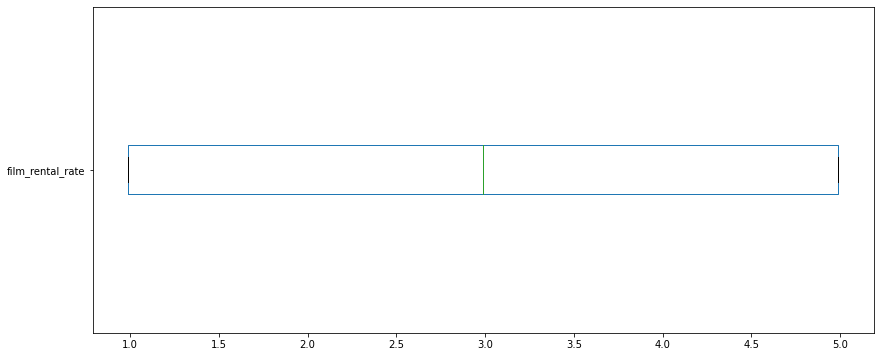

In [12]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

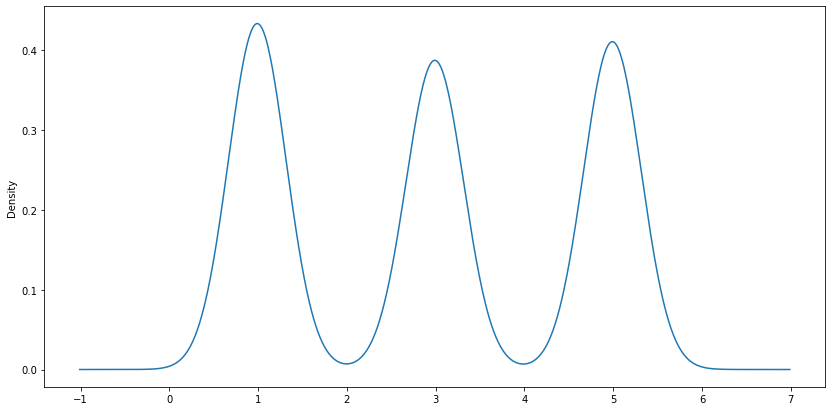

In [13]:
df['film_rental_rate'].plot(kind='density', figsize=(14,7))

In [14]:
df['film_rental_rate'].value_counts()

0.99    1223
4.99    1159
2.99    1093
Name: film_rental_rate, dtype: int64

<AxesSubplot:>

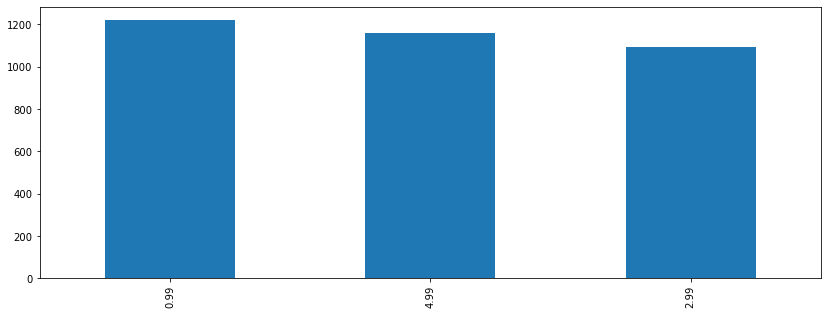

In [15]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,5))

Text(0, 0.5, 'Number of Rental')

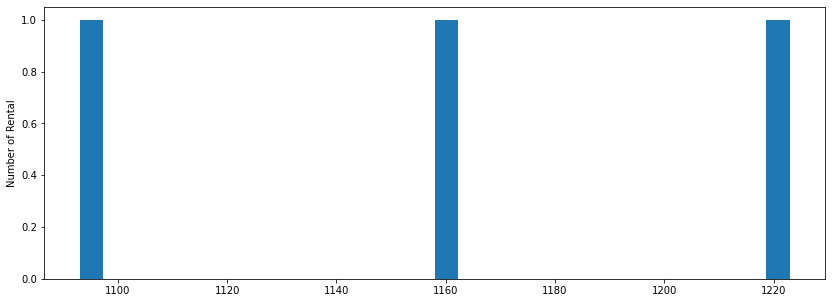

In [16]:
ax = df['film_rental_rate'].value_counts().plot(kind='hist', bins=30, figsize=(14,5))
ax.set_ylabel('Number of Rental')

$$ rental\_gain\_return = \frac{film\_rental\_rate}{film\_replacement\_cost} * 100 $$

In [17]:
df['rental_gain_return'] = df['film_rental_rate']/df['film_replacement_cost'] * 100

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 1 to 16045
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            3475 non-null   datetime64[ns]
 1   return_date            3430 non-null   datetime64[ns]
 2   customer_lastname      3475 non-null   object        
 3   store_id               3475 non-null   int64         
 4   rental_store_city      3475 non-null   object        
 5   film_title             3475 non-null   object        
 6   film_rental_duration   3475 non-null   int64         
 7   film_rental_rate       3475 non-null   float64       
 8   film_replacement_cost  3475 non-null   float64       
 9   film_rating            3475 non-null   object        
 10  rental_gain_return     3475 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 325.8+ KB


In [19]:
df['film_rental_duration'].mean()

4.997122302158274

<AxesSubplot:>

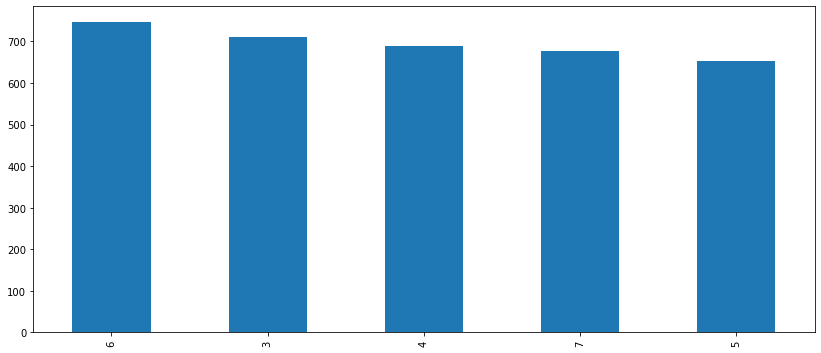

In [20]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 1 to 16045
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            3475 non-null   datetime64[ns]
 1   return_date            3430 non-null   datetime64[ns]
 2   customer_lastname      3475 non-null   object        
 3   store_id               3475 non-null   int64         
 4   rental_store_city      3475 non-null   object        
 5   film_title             3475 non-null   object        
 6   film_rental_duration   3475 non-null   int64         
 7   film_rental_rate       3475 non-null   float64       
 8   film_replacement_cost  3475 non-null   float64       
 9   film_rating            3475 non-null   object        
 10  rental_gain_return     3475 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 325.8+ KB


In [22]:
df['film_rental_rate'].value_counts()

0.99    1223
4.99    1159
2.99    1093
Name: film_rental_rate, dtype: int64

Text(0, 0.5, 'Film Rental Rate')

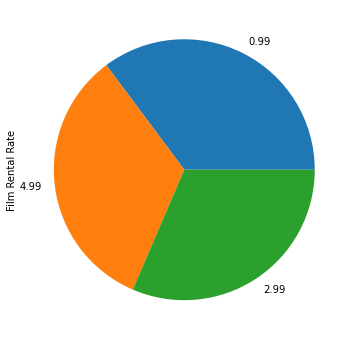

In [23]:
graph = df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(14,6))
graph.set_ylabel('Film Rental Rate')

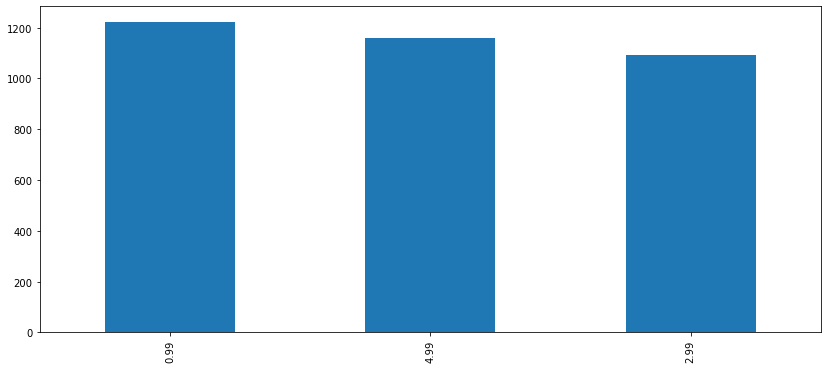

In [24]:
graph = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

Text(0.5, 0, 'Replacement_cost')

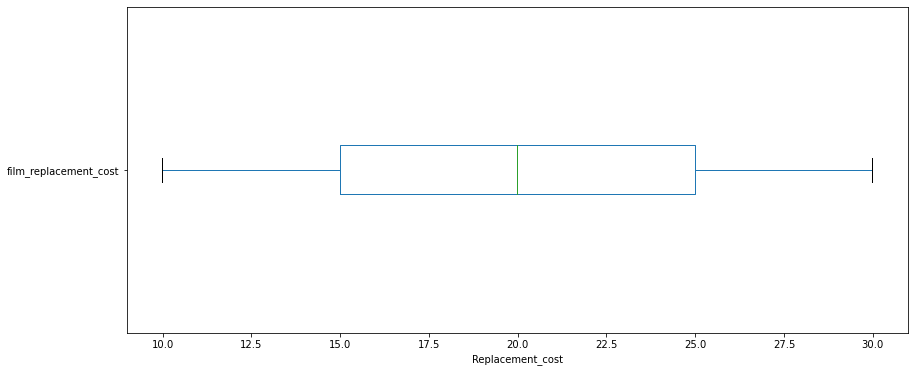

In [25]:
fun = df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))
fun.set_xlabel('Replacement_cost')

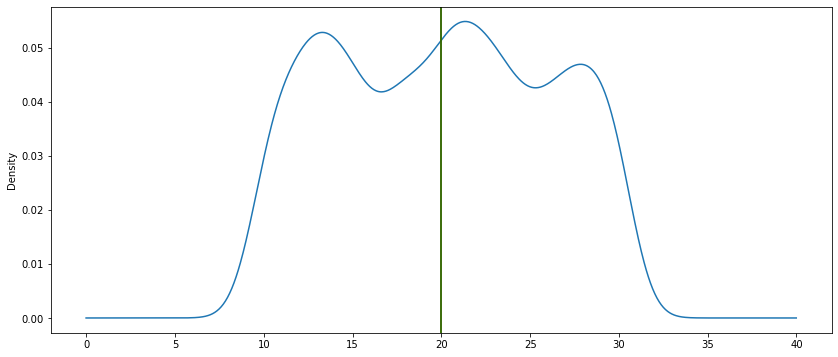

In [26]:
fun = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
fun.axvline(df['film_replacement_cost'].mean(), color='red')
fun.axvline(df['film_replacement_cost'].median(), color='green')


In [27]:
df['film_rating'].value_counts()

PG-13    780
NC-17    714
PG       684
R        675
G        622
Name: film_rating, dtype: int64

<AxesSubplot:>

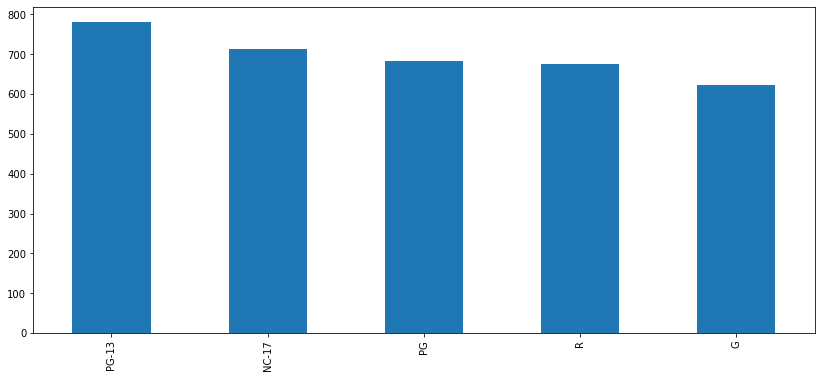

In [28]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 1 to 16045
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            3475 non-null   datetime64[ns]
 1   return_date            3430 non-null   datetime64[ns]
 2   customer_lastname      3475 non-null   object        
 3   store_id               3475 non-null   int64         
 4   rental_store_city      3475 non-null   object        
 5   film_title             3475 non-null   object        
 6   film_rental_duration   3475 non-null   int64         
 7   film_rental_rate       3475 non-null   float64       
 8   film_replacement_cost  3475 non-null   float64       
 9   film_rating            3475 non-null   object        
 10  rental_gain_return     3475 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 325.8+ KB


<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

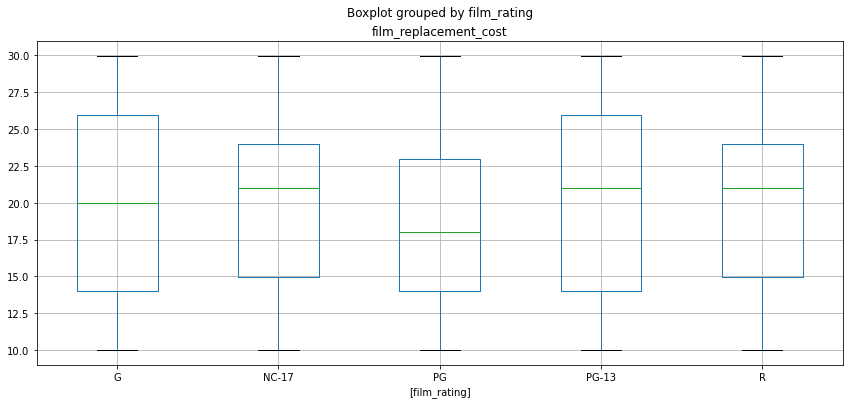

In [30]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

In [31]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

In [32]:
df['rental_days'].value_counts()

8.0    417
6.0    392
5.0    392
4.0    388
1.0    383
7.0    375
3.0    367
2.0    352
9.0    193
0.0    171
Name: rental_days, dtype: int64

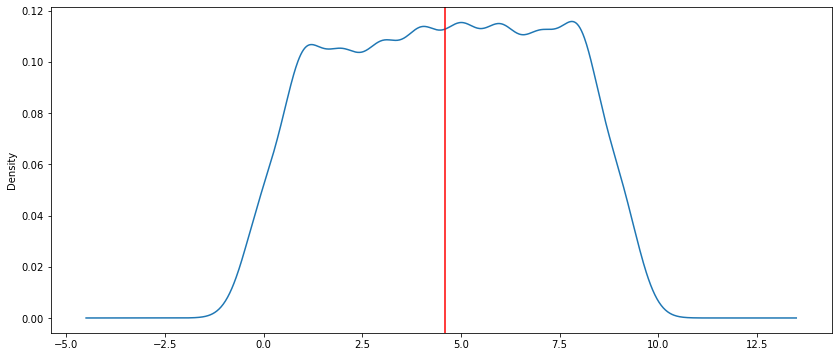

In [33]:
fun = df['rental_days'].plot(kind='density', figsize=(14,6))
fun.axvline(df['rental_days'].mean(), color='red')

In [34]:
df['film_daily_rental_rate'] = df[['film_rental_rate', 'film_rental_duration']].apply(lambda x: (x[0]/x[1]), axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 1 to 16045
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rental_date             3475 non-null   datetime64[ns]
 1   return_date             3430 non-null   datetime64[ns]
 2   customer_lastname       3475 non-null   object        
 3   store_id                3475 non-null   int64         
 4   rental_store_city       3475 non-null   object        
 5   film_title              3475 non-null   object        
 6   film_rental_duration    3475 non-null   int64         
 7   film_rental_rate        3475 non-null   float64       
 8   film_replacement_cost   3475 non-null   float64       
 9   film_rating             3475 non-null   object        
 10  rental_gain_return      3475 non-null   float64       
 11  rental_days             3430 non-null   float64       
 12  film_daily_rental_rate  3475 non-null   float64

In [36]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,guas Lindas de Gois,GOLDMINE TYCOON,6,0.99,20.99,R,4.716532,1.0,0.165000
16,2005-05-25 00:43:11,2005-05-26 04:42:11,CURLEY,1,Miraj,GUNFIGHTER MUSSOLINI,3,2.99,9.99,PG-13,29.929930,1.0,0.996667
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Cuernavaca,SPIRIT FLINTSTONES,7,0.99,23.99,R,4.126719,1.0,0.141429
21,2005-05-25 01:59:46,2005-05-26 01:01:46,MORRELL,1,Cavite,CHITTY LOCK,6,2.99,24.99,G,11.964786,0.0,0.498333
22,2005-05-25 02:19:23,2005-05-26 04:52:23,FORTIER,1,Chapra,RESURRECTION SILVERADO,6,0.99,12.99,PG,7.621247,1.0,0.165000


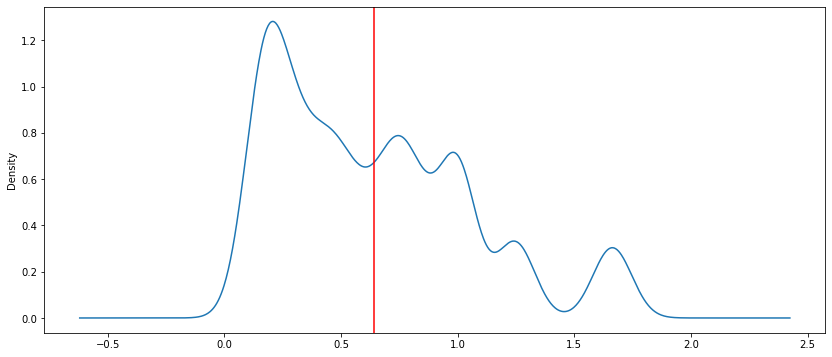

In [37]:
fun = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
fun.axvline(df['film_daily_rental_rate'].mean(), color='red')

In [38]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Cuernavaca,SPIRIT FLINTSTONES,7,0.99,23.99,R,4.126719,1.0,0.141429
228,2005-05-26 10:54:28,2005-06-04 09:39:28,CHISHOLM,2,Plock,LAWRENCE LOVE,7,0.99,23.99,NC-17,4.126719,8.0,0.141429
300,2005-05-26 20:57:00,2005-06-05 01:34:00,PARKER,1,Juazeiro do Norte,DRACULA CRYSTAL,7,0.99,26.99,G,3.668025,9.0,0.141429
591,2005-05-28 13:11:04,2005-05-29 17:20:04,MARTINEZ,2,Kimberley,GREASE YOUTH,7,0.99,20.99,G,4.716532,1.0,0.141429
595,2005-05-28 13:59:54,2005-06-05 15:16:54,WATTS,1,Dayton,MOON BUNCH,7,0.99,20.99,PG,4.716532,8.0,0.141429
613,2005-05-28 15:27:22,2005-06-02 20:01:22,GUNDERSON,1,Jinzhou,EARTH VISION,7,0.99,29.99,NC-17,3.301100,5.0,0.141429
614,2005-05-28 15:33:28,2005-06-04 12:27:28,JOY,1,Angra dos Reis,EMPIRE MALKOVICH,7,0.99,26.99,G,3.668025,6.0,0.141429
664,2005-05-28 21:31:08,2005-06-02 20:56:08,GUAJARDO,1,Vinh,BOONDOCK BALLROOM,7,0.99,14.99,NC-17,6.604403,4.0,0.141429
667,2005-05-28 21:49:02,2005-05-31 03:07:02,FORSYTHE,1,Patras,SILENCE KANE,7,0.99,23.99,R,4.126719,2.0,0.141429


In [39]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
139,2005-05-25 23:00:21,2005-05-29 17:12:21,DOUGLAS,1,Beira,FOOL MOCKINGBIRD,3,4.99,24.99,PG,19.967987,3.0,1.663333
167,2005-05-26 02:50:31,2005-05-27 03:07:31,CARRANZA,2,Koriyama,SUNRISE LEAGUE,3,4.99,19.99,PG-13,24.962481,1.0,1.663333
212,2005-05-26 08:34:41,2005-05-30 12:46:41,MURPHY,1,Mysore,SATURDAY LAMBS,3,4.99,28.99,G,17.212832,4.0,1.663333
227,2005-05-26 10:51:46,2005-05-30 07:24:46,BAUGHMAN,2,Kaliningrad,DAUGHTER MADIGAN,3,4.99,13.99,PG-13,35.668335,3.0,1.663333
233,2005-05-26 11:43:44,2005-05-28 17:28:44,WAUGH,2,Kuwana,RANGE MOONWALKER,3,4.99,25.99,PG,19.199692,2.0,1.663333
284,2005-05-26 19:21:44,2005-06-04 14:18:44,MARKHAM,2,Almirante Brown,GARDEN ISLAND,3,4.99,21.99,G,22.692133,8.0,1.663333
340,2005-05-27 03:55:25,2005-06-04 07:57:25,CHAPMAN,2,Bhilwara,VIRTUAL SPOILERS,3,4.99,14.99,NC-17,33.288859,8.0,1.663333
505,2005-05-28 02:06:37,2005-05-29 06:57:37,OWENS,1,Caracas,BILKO ANONYMOUS,3,4.99,25.99,PG-13,19.199692,1.0,1.663333
653,2005-05-28 20:12:20,2005-06-04 14:44:20,THRASHER,1,Adana,CASUALTIES ENCINO,3,4.99,16.99,G,29.370218,6.0,1.663333


In [40]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,guas Lindas de Gois,GOLDMINE TYCOON,6,0.99,20.99,R,4.716532,1.0,0.165000
16,2005-05-25 00:43:11,2005-05-26 04:42:11,CURLEY,1,Miraj,GUNFIGHTER MUSSOLINI,3,2.99,9.99,PG-13,29.929930,1.0,0.996667
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Cuernavaca,SPIRIT FLINTSTONES,7,0.99,23.99,R,4.126719,1.0,0.141429
21,2005-05-25 01:59:46,2005-05-26 01:01:46,MORRELL,1,Cavite,CHITTY LOCK,6,2.99,24.99,G,11.964786,0.0,0.498333
22,2005-05-25 02:19:23,2005-05-26 04:52:23,FORTIER,1,Chapra,RESURRECTION SILVERADO,6,0.99,12.99,PG,7.621247,1.0,0.165000


In [41]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

0

In [42]:
df.loc[df['rental_store_city'] == 'Lethbridge']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,


In [43]:
df.loc[df['rental_store_city'] == 'Woodridge'].shape

(0, 13)

In [44]:
df['rental_store_city'].unique()

array(['guas Lindas de Gois', 'Miraj', 'Cuernavaca', 'Cavite', 'Chapra',
       'Lipetsk', 'NDjamna', 'Vinh', 'Hodeida', 'Katihar', 'Najafabad',
       'Shubra al-Khayma', 'Izumisano', 'Mukateve', 'Allende',
       'Lengshuijiang', 'Tiefa', 'Dallas', 'Bijapur', 'Mexicali',
       'Huixquilucan', 'El Alto', 'Purwakarta', 'Okinawa', 'Maring',
       'Braslia', 'Naju', 'Callao', 'Beira', 'Santo Andr', 'La Plata',
       'Ahmadnagar', 'Karnal', 'Tsuyama', 'Alvorada', 'Nukualofa',
       'Koriyama', 'Oyo', 'Coacalco de Berriozbal', 'Xintai',
       's-Hertogenbosch', 'Tartu', 'Mardan', 'Duisburg',
       'Juazeiro do Norte', 'Bhavnagar', 'Mysore', 'Changzhou',
       'Cuauhtmoc', 'Kaliningrad', 'Plock', 'Kuwana', 'Tonghae', 'Fuyu',
       'Jedda', 'Valencia', 'Coatzacoalcos', 'Tangail', 'Ashgabat',
       'Baybay', 'Kursk', 'Sunnyvale', 'Huaian', 'Almirante Brown',
       'Cabuyao', 'Tanshui', 'Ogbomosho', 'Deba Habe', 'Kimberley',
       'Bhilwara', 'Uluberia', 'Celaya', 'Dzerzinsk', 'Qaly

In [45]:
df.loc[df['rental_store_city'] == 'London', 'film_rating'].value_counts()

PG       4
G        4
PG-13    4
NC-17    2
R        1
Name: film_rating, dtype: int64

<AxesSubplot:>

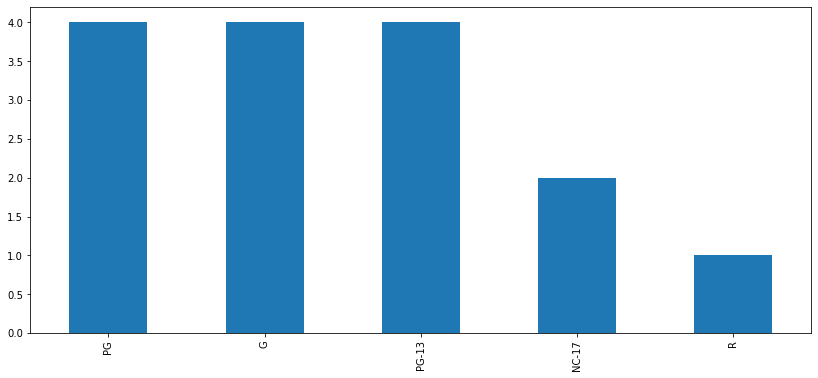

In [46]:
df.loc[df['rental_store_city'] == 'London', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

In [47]:
df.loc[df['rental_store_city'] == 'Brest']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
6183,2005-07-11 11:14:35,2005-07-16 15:35:35,YANEZ,1,Brest,STREETCAR INTENTIONS,5,4.99,11.99,R,41.618015,5.0,0.998
11549,2005-08-17 01:01:48,2005-08-19 21:24:48,YANEZ,2,Brest,VIRGINIAN PLUTO,5,0.99,22.99,R,4.306220,2.0,0.198


In [48]:
df['rental_store_city'].value_counts()

London           15
Halisahar        14
Usak             12
Changzhou        12
Fukuyama         12
                 ..
Hino              1
Shivapuri         1
ostka             1
Ktahya            1
Hubli-Dharwad     1
Name: rental_store_city, Length: 595, dtype: int64

In [49]:
df.loc[df['rental_store_city'] == 'Halisahar'].shape

(14, 13)

In [50]:
df.loc[(df['rental_store_city'] == 'Halisahar') & (df['film_rental_duration'] > 5)].shape

(5, 13)

In [51]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
16,2005-05-25 00:43:11,2005-05-26 04:42:11,CURLEY,1,Miraj,GUNFIGHTER MUSSOLINI,3,2.99,9.99,PG-13,29.929930,1.0,0.996667
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Cuernavaca,SPIRIT FLINTSTONES,7,0.99,23.99,R,4.126719,1.0,0.141429
29,2005-05-25 03:47:12,2005-05-30 00:31:12,TURNER,2,Lipetsk,MUSKETEERS WAIT,7,4.99,17.99,PG,27.737632,4.0,0.712857
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,NDjamna,HARRY IDAHO,5,4.99,18.99,PG-13,26.276988,3.0,0.998000
60,2005-05-25 08:58:25,2005-05-30 14:14:25,ALLARD,2,Hodeida,FORRESTER COMANCHEROS,7,4.99,22.99,NC-17,21.705089,5.0,0.712857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16020,2005-08-23 21:34:33,2005-09-01 18:17:33,TROUT,2,Kursk,ELEPHANT TROJAN,4,4.99,24.99,PG-13,19.967987,8.0,1.247500
16029,2005-08-23 21:54:02,2005-08-29 23:55:02,GORDON,2,Kilis,WAIT CIDER,3,0.99,9.99,PG-13,9.909910,6.0,0.330000
16035,2005-08-23 22:08:04,2005-08-28 03:46:04,BAKER,2,Nanyang,MAGNOLIA FORRESTER,4,0.99,28.99,PG-13,3.414971,4.0,0.247500


In [52]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape

(1803, 13)